In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [42]:
path = ##parent dir

In [43]:
data = pd.read_excel(path +'\\Gene_HeatMap_testdata.xlsx')

### display heatmap data

In [44]:
#I left the Whole Metagenome column as 0, so that I could fill with values later on through Illustrator. 
#For each gene, a value means that the gene is present, and a 0 means that a gene is not present. 
#You have to play with the values to get the color you want. To change the color range, refer to cmap = 'tab20c_r' in line 58.
data

,Process,Gene,Whole Metagenome,Species 1,Species 2,Species 3,Species 4,Species 5,Species 6,Species 7,Species 8
0,Fe Oxidation,gene 1,0,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
1,NaN,gene 2,0,0.00,0.90,0.00,0.00,0.00,0.00,0.00,0.00
2,Denitrification,gene 3,0,0.00,0.77,0.77,0.77,0.77,0.00,0.77,0.00
3,NaN,gene 4,0,0.00,0.71,0.71,0.00,0.71,0.00,0.71,0.71
4,NaN,gene 5,0,0.68,0.68,0.68,0.68,0.00,0.00,0.00,0.68
5,NaN,gene 6,0,0.65,0.65,0.00,0.00,0.65,0.65,0.65,0.00
6,NaN,gene 7,0,0.00,0.62,0.62,0.62,0.00,0.00,0.62,0.00
7,Carbon Fixation,gene 8,0,0.59,0.59,0.59,0.00,0.59,0.00,0.59,0.59
8,NaN,gene 9,0,0.00,0.50,0.50,0.00,0.50,0.00,0.50,0.50
9,Oxygen Tolerance,gene 10,0,0.45,0.45,0.45,0.45,0.45,0.00,0.45,0.45


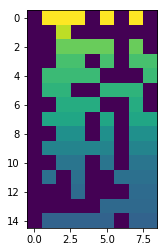

In [45]:
plt.imshow(data[data.columns[2:]])

### checking column names

In [46]:
data.columns

Index(['Process', 'Gene', 'Whole Metagenome', 'Species 1', 'Species 2',
       'Species 3', 'Species 4', 'Species 5', 'Species 6', 'Species 7',
       'Species 8'],
      dtype='object')

### this is an adapted heat map function from matplotlib suited for the gene indication data. Function will save a figure in the working directory "Thesis_Gene_HeatMap_horizontal".

In [47]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", swap_axes = 0, **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        plt.figure(dpi = 300)
        ax = plt.gca()

    # Plot the heatmap
    if swap_axes:
        #default set to zero. to transpose this flag must be 1
        pltdata = data.T
    else:
        pltdata = data
    im = ax.imshow(pltdata, **kwargs)

    
    #If you want to play with your heatmap colors, uncomment this to create a colorbar
    # Create colorbar
    #cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    #cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(pltdata.shape[1]))
    ax.set_yticks(np.arange(pltdata.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels, style = 'italic')

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=50, ha="left",
             rotation_mode="anchor", fontstyle = 'italic')

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(pltdata.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(pltdata.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    
    plt.savefig('Thesis_Gene_HeatMap_horizontal', dpi = 300, bbox_inches = 'tight')
    
    return im, #cbar

### Plotting the heatmap. Use swap_axes = 1 for horizontal figure. Use swap_axes = 0 for a vertical figure. 

(<matplotlib.image.AxesImage at 0x15b6e327048>,)

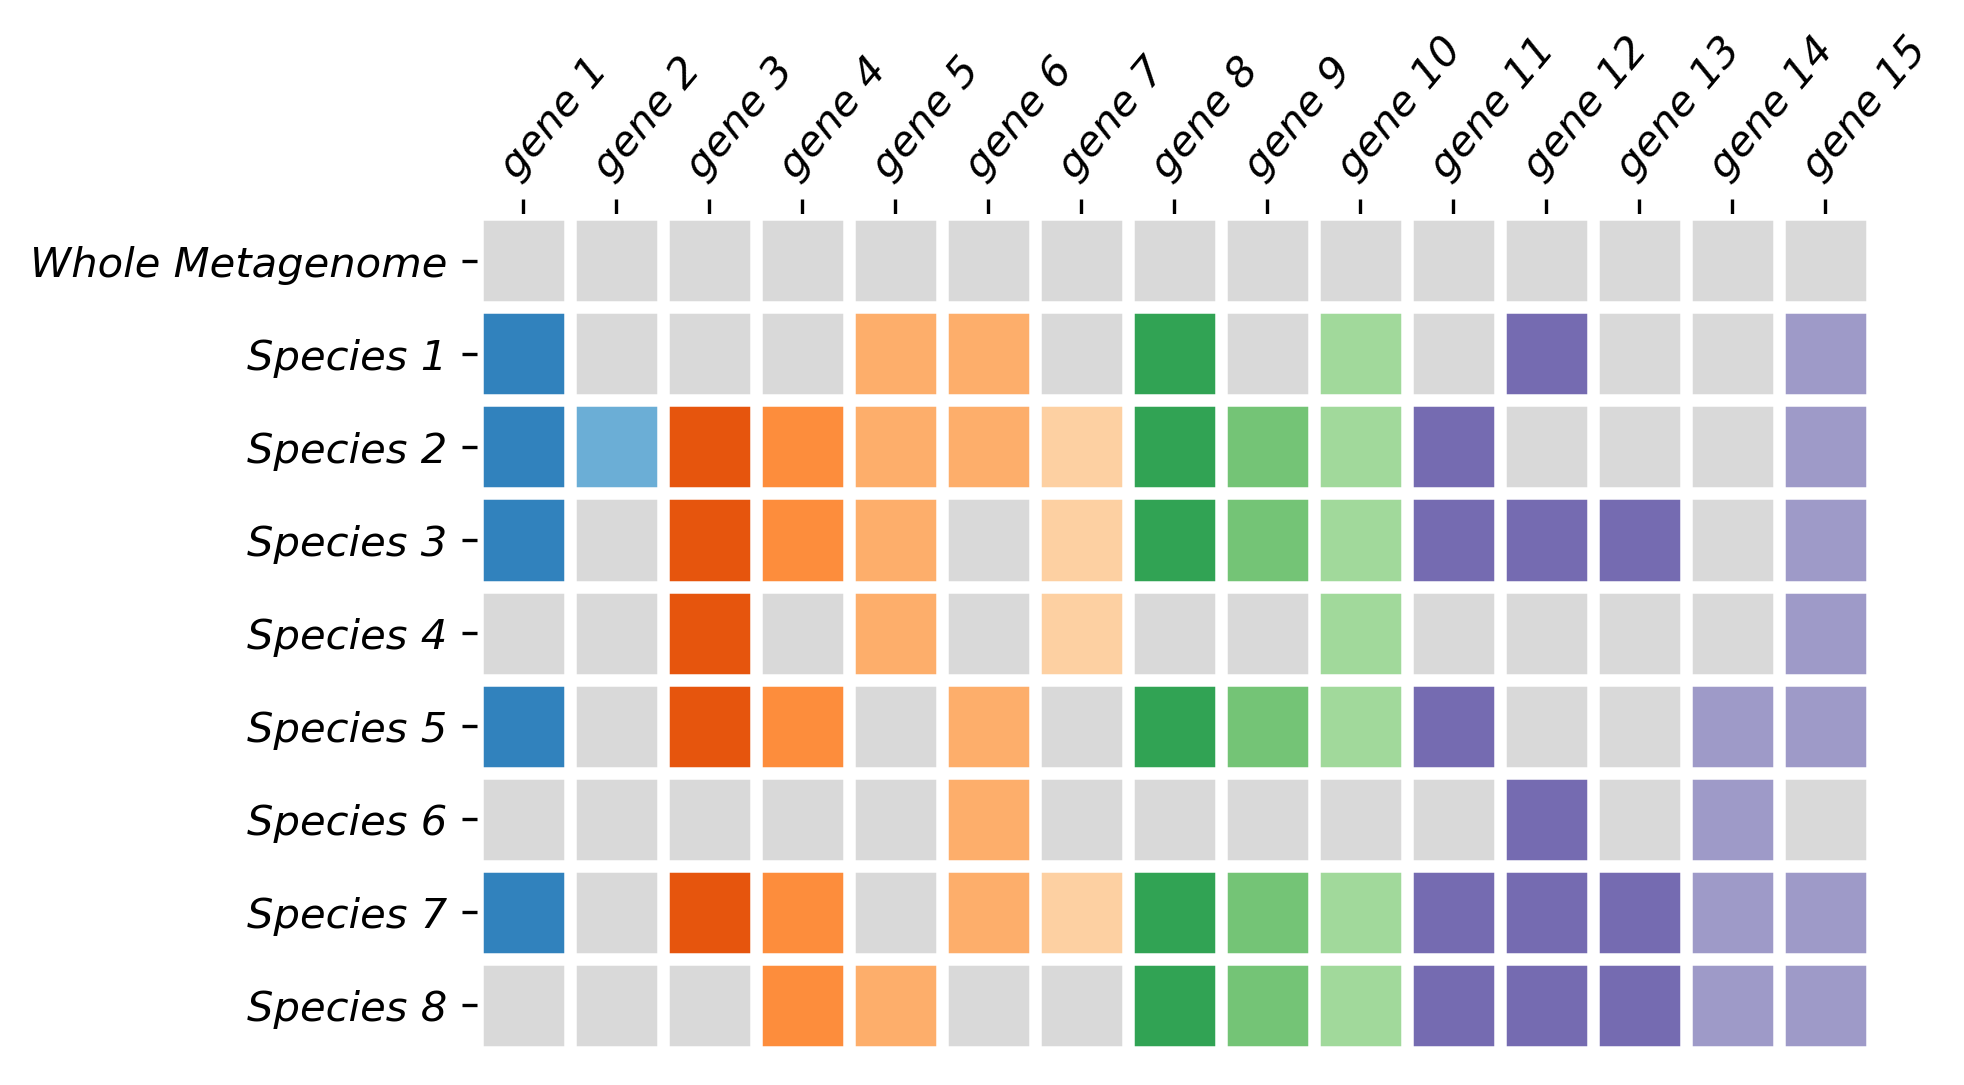

In [48]:
swap_axes = 1
if swap_axes:
    row_names = data.columns[2:]
    columns_names = data['Gene']
else:
    row_names = data['Gene']
    columns_names = data.columns[2:]

heatmap(data[data.columns[2:]], row_labels =row_names , col_labels = columns_names, swap_axes = swap_axes, cmap = 'tab20c_r')